Name : Kunal Mody

Batch : DS2312

#### BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

##### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


##### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
#### About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

##### You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
##### Dataset Attributes
Here is the description of all the variables:

        •	Variable: Definition
  
        •	ID: Unique client ID
  
        •	age: Age of the client
  
        •	job: Type of job
  
        •	marital: Marital status of the client
  
        •	education: Education level
  
        •	default: Credit in default.
  
        •	housing: Housing loan
  
        •	loan: Personal loan
  
        •	contact: Type of communication
  
        •	month: Contact month
  
        •	day_of_week: Day of week of contact
  
        •	duration: Contact duration
  
        •	campaign: number of contacts performed during this campaign to the client
  
        •	pdays: number of days that passed by after the client was last contacted
  
        •	previous: number of contacts performed before this campaign
  
        •	poutcome: outcome of the previous marketing campaign

##### Output variable (desired target):
       
       •	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [116]:
#importing csv training dataset for Bank Marketing 
bm_train = pd.read_csv('termdeposit_train.csv')
bm_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [117]:
# now checking top 10 and bottom 10 row of the training dataset

In [118]:

bm_train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [119]:
bm_train.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31637,20110,44,technician,married,secondary,no,5163,no,no,cellular,11,aug,48,2,-1,0,unknown,no
31638,16309,29,blue-collar,married,secondary,no,721,yes,no,cellular,23,jul,644,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [120]:
# checking shape of dataset
bm_train.shape

(31647, 18)

In [121]:
# so we have 31647 rows or entries and 18 columns in our dataset

In [122]:
# checking datatype 
bm_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [123]:
# we can see that our dataset consist of int64 and object type of data

In [124]:
# checking for null values in our dataset
bm_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [125]:
bm_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [126]:
# we can see that there are no null values in our dataset

In [127]:
# let's check it with heatmap 

<Axes: >

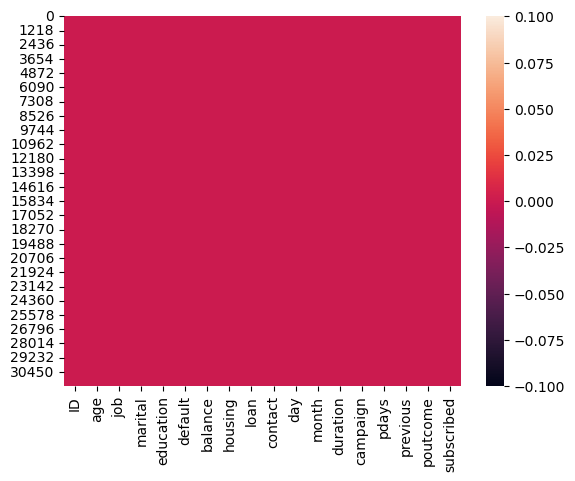

In [128]:
sns.heatmap(bm_train.isnull())

In [129]:
# so now we can confirm that there are no null values in our dataset

In [130]:
# chekcing unique values
bm_train.nunique().to_frame('Uniques_Values')

,Uniques_Values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [131]:
# so we can see that ID column has each row unique so there is no issue of ID duplication
# we can see that in subscribed columns there are only 2 values / unique values ('no' and 'yes')
# so we can divide our dataset on base of subscribed entries

In [132]:
# value count for each column
for i in bm_train.columns:
    print(bm_train[i].value_counts(), '\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64 

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64 

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 

no     31062
yes      585
Name: default, dtype: int64 

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [133]:
# so from above we can confirm that in 'subscribed' column there is 
# two values 'yes' and 'no'

In [134]:
# summary of numerical columns
bm_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [135]:
# so we can see that in all numeric columns apart from 'pdays' 
# and 'previous' median all columns have higher median value then mean.


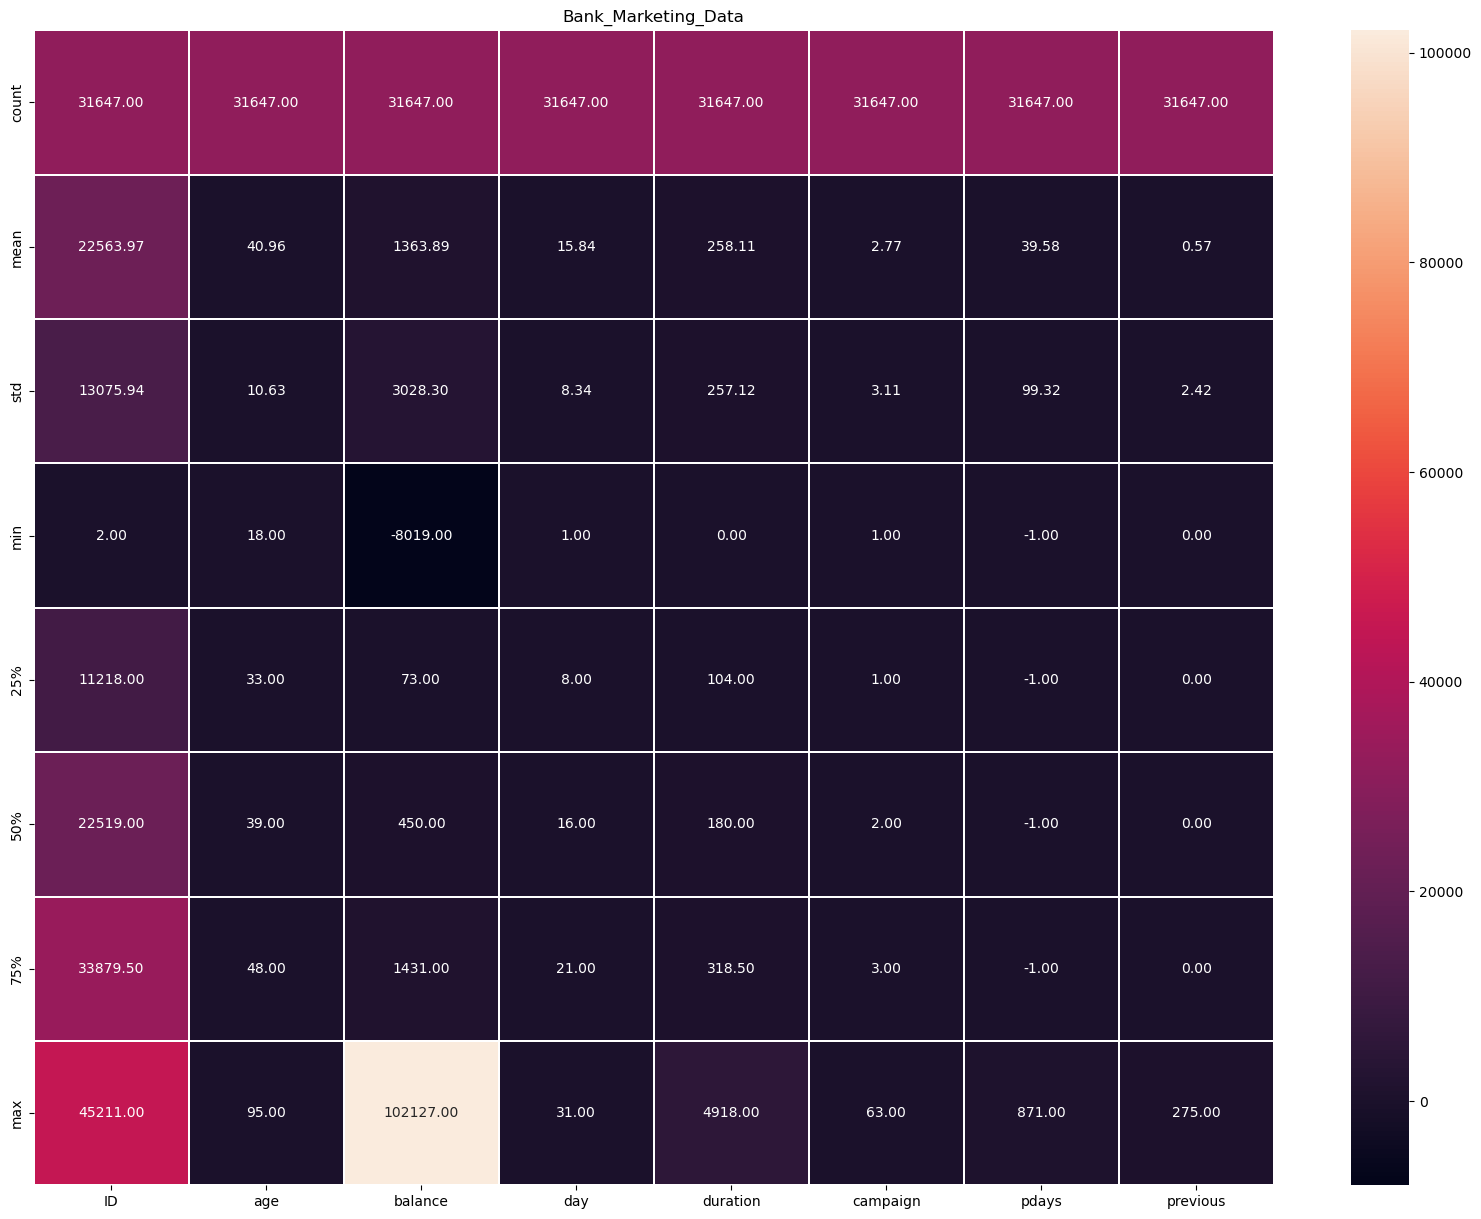

In [136]:
plt.figure(figsize =(20,15))
sns.heatmap(bm_train.describe(), annot = True, fmt = '0.2f', linewidth = 0.2)
plt.xlable = ('Client_Data')
plt.ylable = ('Column_Name')
plt.title('Bank_Marketing_Data')
plt.show()

In [137]:
# we will check for duplicates in our dataset
bm_train.duplicated().sum()

0

In [138]:
# so there are no duplicate in our training dataset

In [139]:
# now as we know that 'subscribed' column is our main target column and 
# we have already done value count on it we will put this in graph

<Axes: xlabel='subscribed', ylabel='count'>

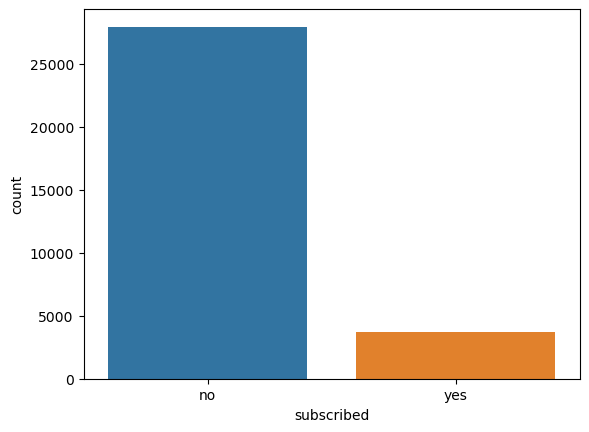

In [140]:
sns.countplot(data=bm_train, x= 'subscribed')

In [141]:
# now we will convert 'subscribed' column so we will have better understanding in percentage form

In [142]:
print('percentage of subscribed :','\n',bm_train['subscribed'].value_counts(normalize=True)*100)

percentage of subscribed : 
 no     88.261131
yes    11.738869
Name: subscribed, dtype: float64


In [143]:
# so we can see that 88% has not subscribed our main traget is 'no' 

In [144]:
# we will now do analysis of diffrent factors and see their impact on 'subscribed'
# We have already done value counts for all of the columns so we can use that data for it

#we will create data frame for all categorical columns

cat_features = bm_train[[ 'job','marital', 'education','default', 'housing', 'loan','contact', 'poutcome']]

fig, ax= plt.subplots(4,2,figsize =(10,8))

for i in cat_features:

    sns.countplot(cat_features[i], x=bm_train['subscribed'])

plt.show()

#i was trying to get all countplot in one frame but I belive I am making sum mistake

<Axes: xlabel='count', ylabel='job'>

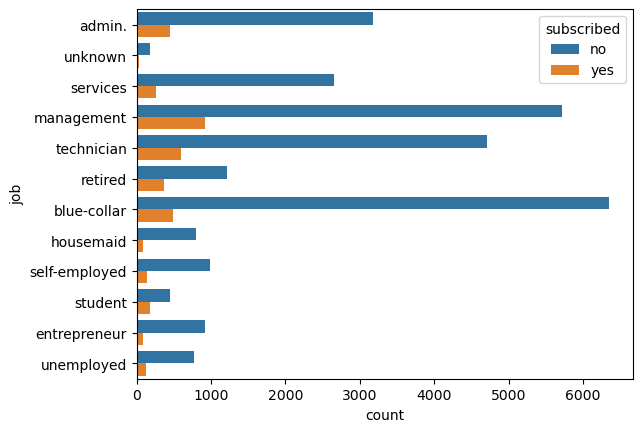

In [145]:
sns.countplot(data=bm_train,y=bm_train['job'], hue = 'subscribed')

In [146]:
# we can see that maximum number of subscription is from 'management' then followed by 'technician', blue-collar', 'admin' 
# least subcriptions are from 'housemaid', 'entrepreneur'

<Axes: xlabel='count', ylabel='marital'>

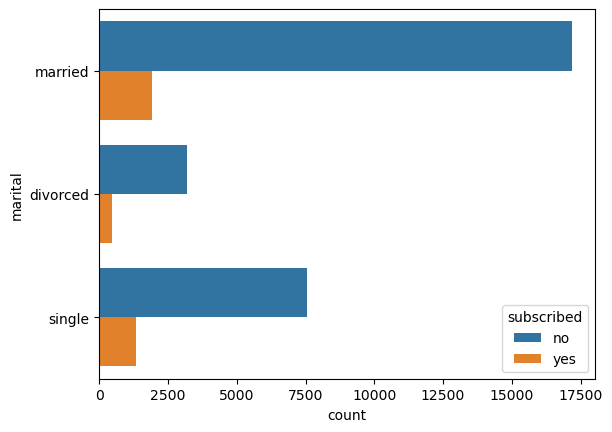

In [147]:
sns.countplot(data=bm_train,y=bm_train['marital'], hue = 'subscribed')

In [148]:
# 'divorced' has least subcriptions

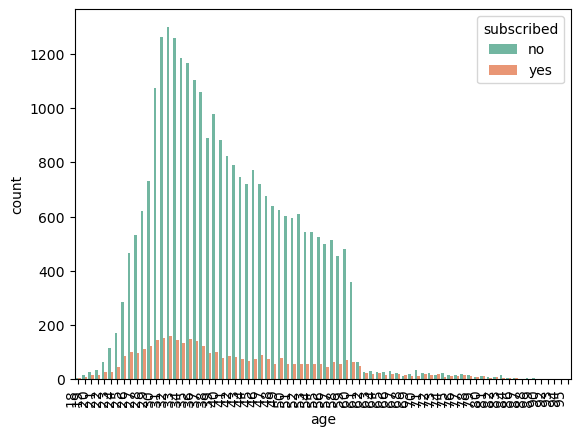

In [149]:

sns.countplot(x=bm_train['age'], hue = bm_train['subscribed'], palette ='Set2')
plt.xticks(rotation=90, ha='right')
plt.show()

bm = sns.factorplot(x=bm_train['age'], y = bm_train['subscribed'], col_wrap =2,kind ='count', sharex =False, sharey=False, palette =pokemon_color_palette)
for i in bm.axes.flat:
    for label in i.get_xticklabels():
        label.set_rotation(60)

for i in bm.axes.flat:
    ax.set_xlabel(bm_train['age'], color = 'indianred')
    
plt.tight_layout()

i was trying to get space inbtween labels but encounter error

In [151]:
sns.factorplot(x ='subscribed', y ='job', data = bm_train) 
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [162]:
# we will convert our target variables in to 0 and 1
bm_train['subscribed'].replace('no',0, inplace =True)
bm_train['subscribed'].replace('yes',1, inplace =True)
bm_train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [163]:
# now we will check for Correlation

In [164]:
train_corr = bm_train.corr()
train_corr

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

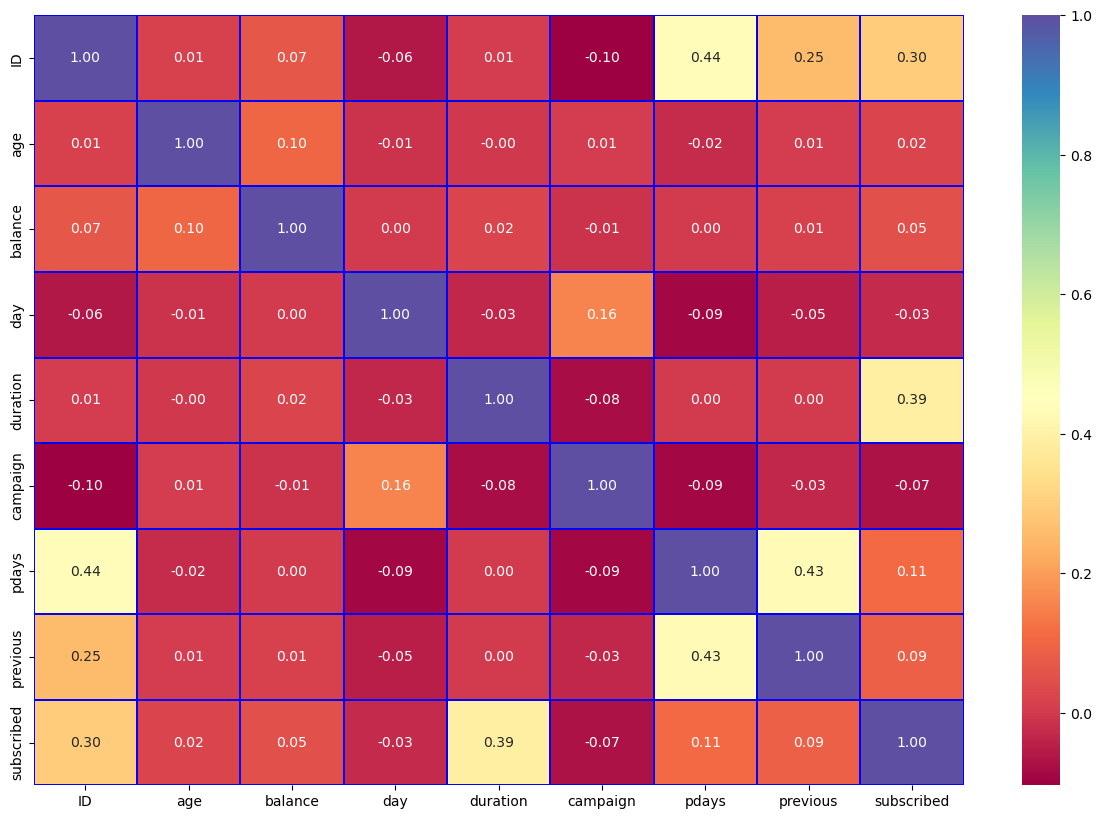

In [165]:
plt.figure(figsize= (15,10))
sns.heatmap(train_corr, annot =True, fmt ='0.2f', linewidth =0.2, linecolor='blue',cmap= 'Spectral')

In [166]:
# from above we can see that 'duration' is highly correlated with 'subscribed'. So we can say that if duration of the call is longer 
#  there are high chance of subscribe to term deposit

In [167]:
# Now for bivariate analysis for rest of the columns we will convert all remaining columns with object data type to int64

In [169]:
from sklearn.preprocessing import LabelEncoder
bm_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed     int64
dtype: object

In [170]:
# so now as we can see above we have to convert 'job','marital', 'education', 'default', 'housing', 'loan',
# 'contact', 'month', and 'poutcome'

In [172]:
le = LabelEncoder()
bm_train['job']=le.fit_transform(bm_train['job'])
bm_train['marital']=le.fit_transform(bm_train['marital'])
bm_train['education']=le.fit_transform(bm_train['education'])
bm_train['default']=le.fit_transform(bm_train['default'])
bm_train['housing']=le.fit_transform(bm_train['housing'])
bm_train['loan']=le.fit_transform(bm_train['loan'])
bm_train['contact']=le.fit_transform(bm_train['contact'])
bm_train['month']=le.fit_transform(bm_train['month'])
bm_train['poutcome']=le.fit_transform(bm_train['poutcome'])
bm_train.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
5,29390,33,4,2,2,0,0,1,0,0,2,3,116,3,-1,0,3,0
6,40444,56,5,1,1,0,1044,0,0,1,3,5,353,2,-1,0,3,1
7,40194,50,9,2,1,0,1811,0,0,0,8,6,97,4,-1,0,3,0
8,29824,45,1,0,1,0,1951,1,0,0,4,3,692,1,-1,0,3,0
9,44676,35,0,1,1,0,1204,0,0,0,3,11,789,2,-1,0,3,0


In [173]:
bm_train.dtypes

ID            int64
age           int64
job           int64
marital       int64
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int64
subscribed    int64
dtype: object

In [174]:
# so we can see that now we have all columns with int64 data types

In [177]:
# we will check for data relations with subscribed column

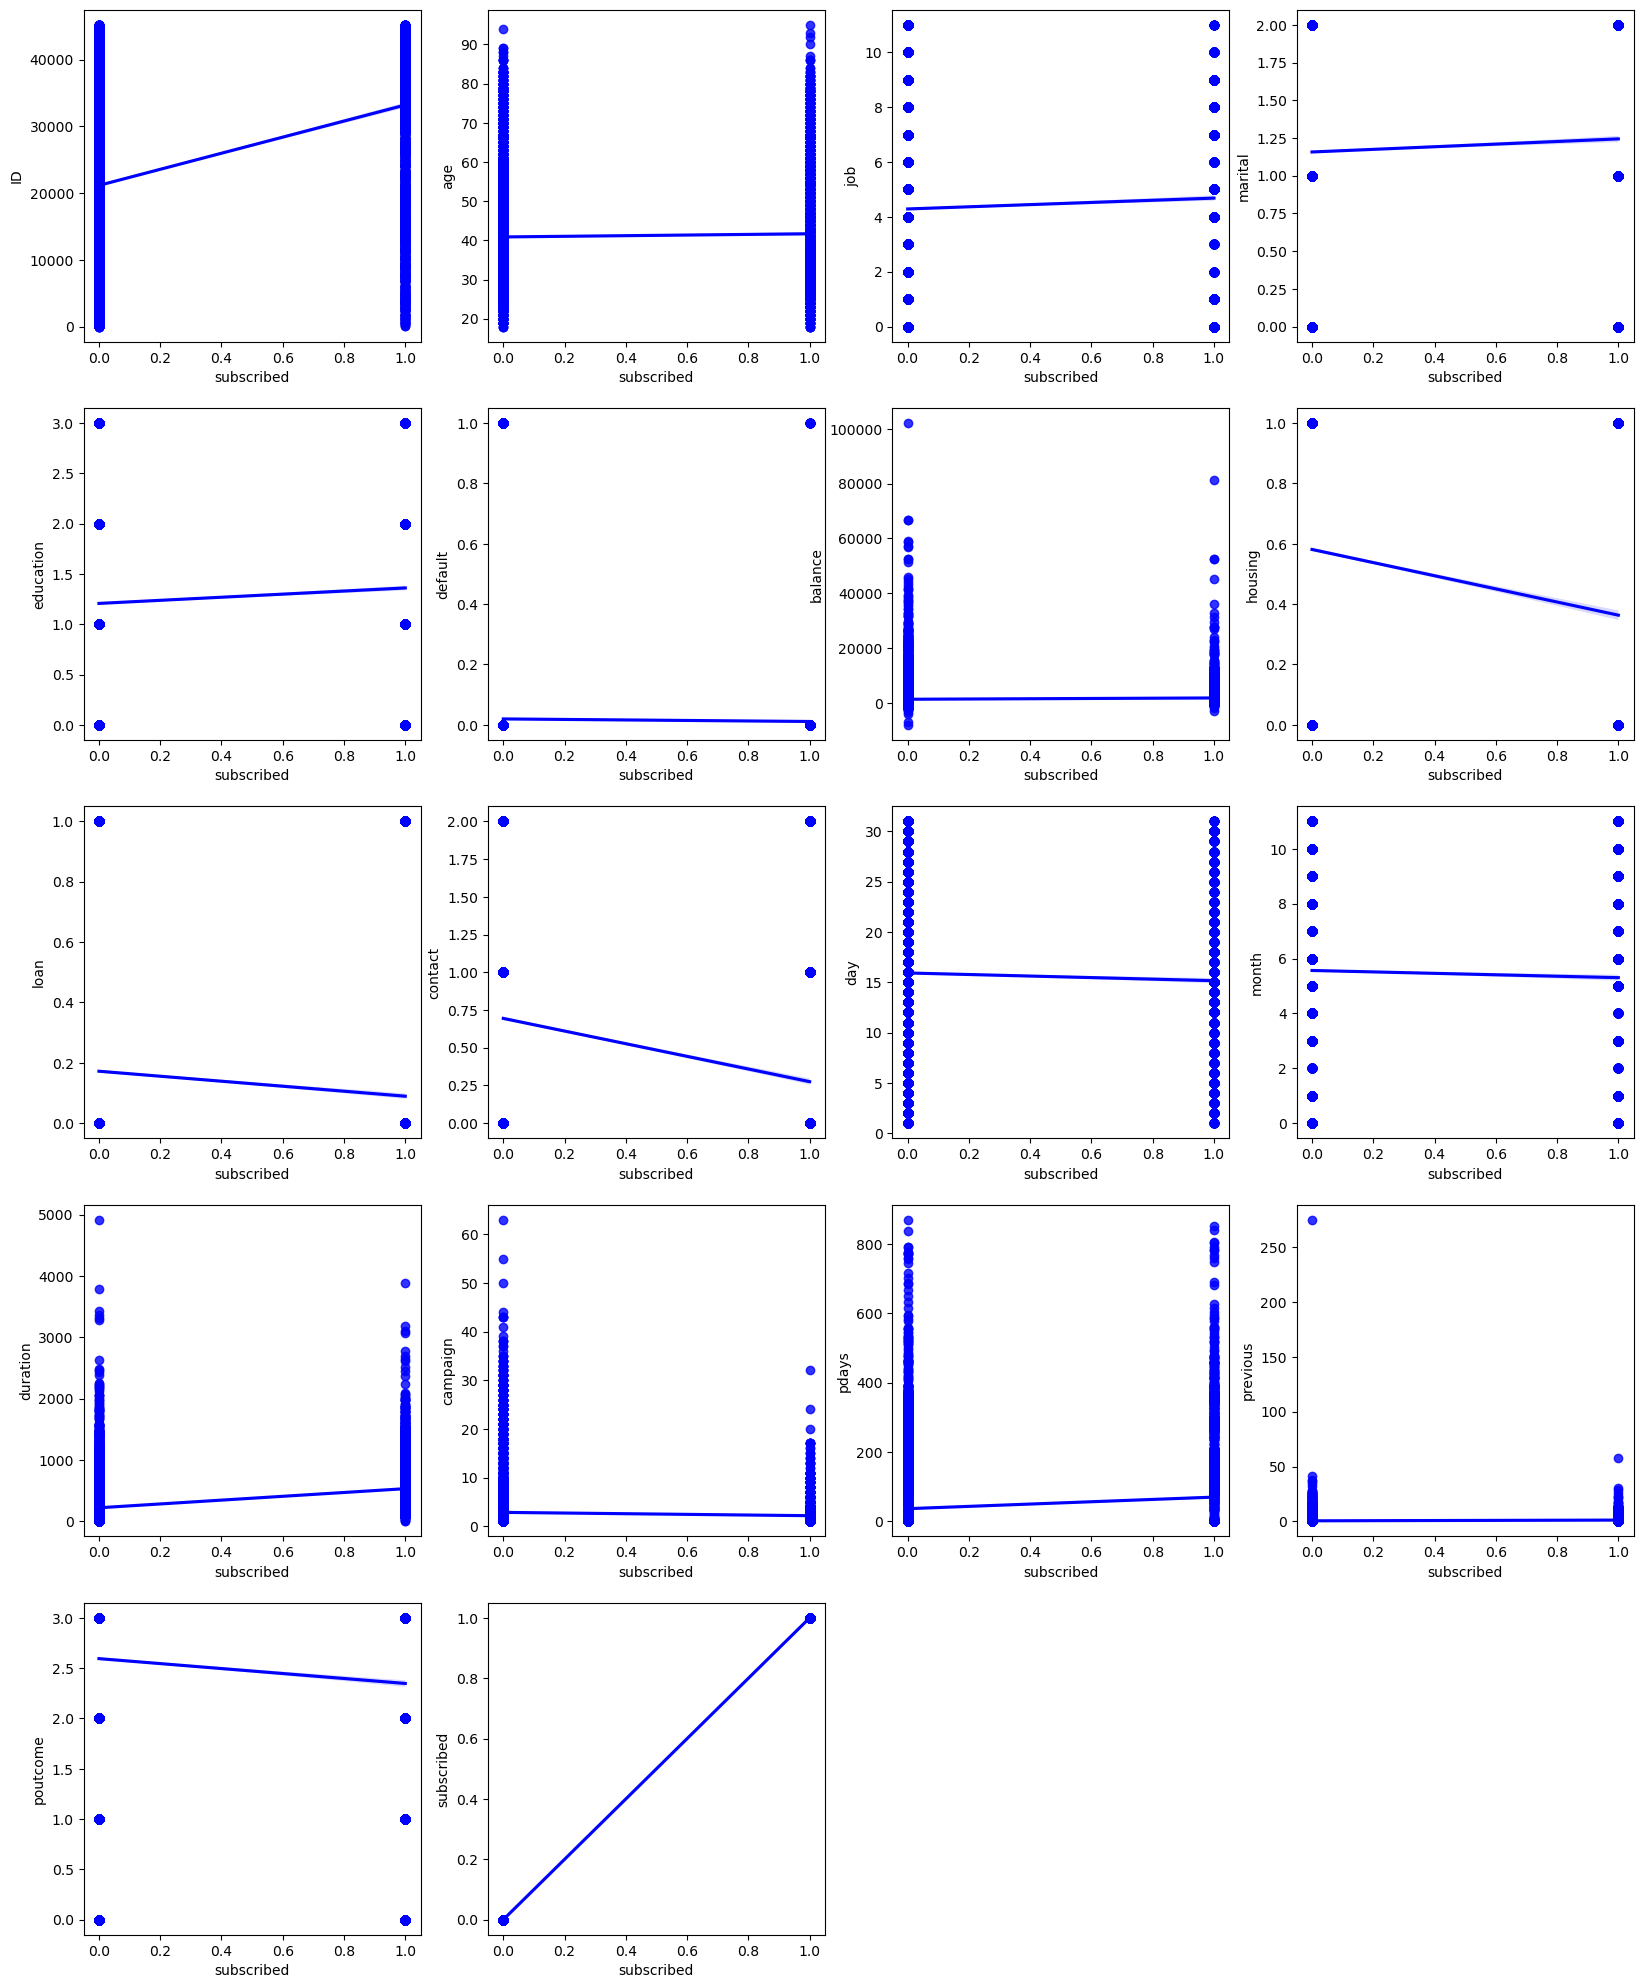

In [178]:
plt.figure(figsize=(20,25))
p=1
for i in bm_train:
    if p<=18:
        plt.subplot(5,4,p)
        sns.regplot(x='subscribed', y= i, data = bm_train, color ='b')
    p+=1
plt.show()

In [179]:
# from above we can see that 'previous', 'day','month', 'default', 'balance', and 'age' has not much impact on 'subscribed'

In [180]:
# we will check for outlier in our dataset

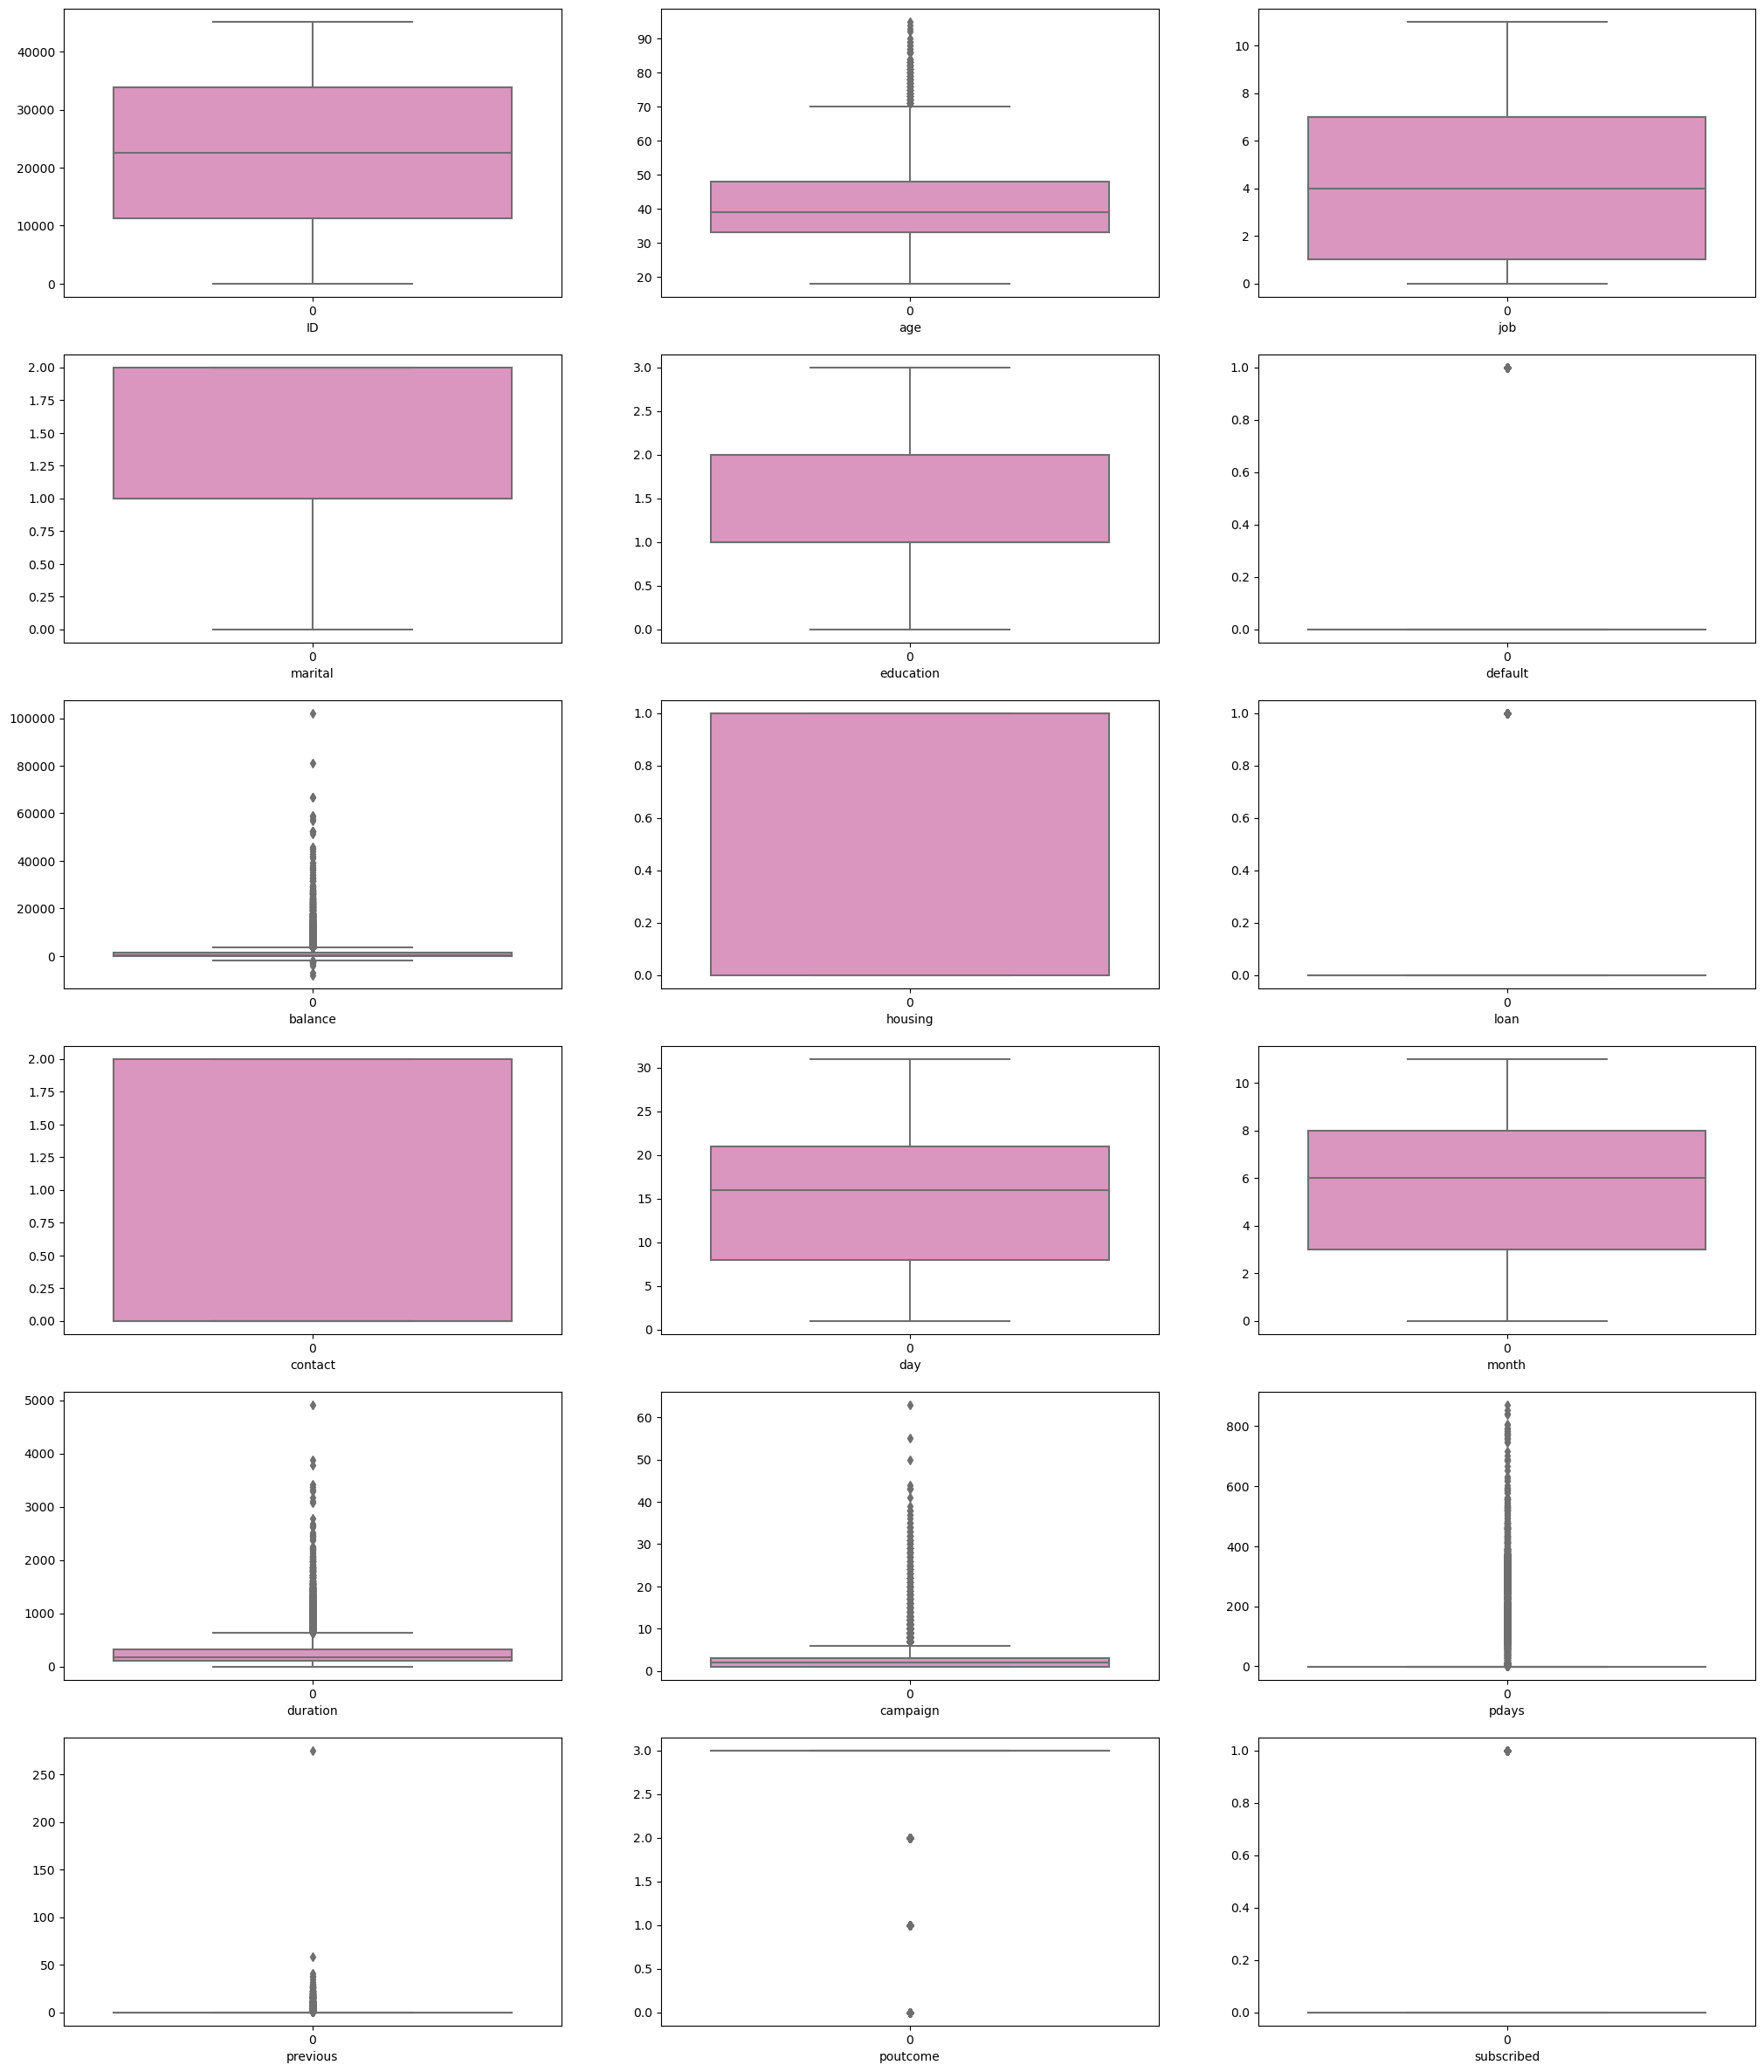

In [183]:
plt.figure(figsize =(25,30))
p =1
for i in bm_train:
    if p<=18:
        plt.subplot(6,3,p)
        sns.boxplot(bm_train[i],palette ='Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

In [184]:
# so we have outliers in our dataset

In [185]:
bm_train.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [186]:
# we can see that 'previous', 'default','balance', has very high skewness and as well they are not much impactfull on our
# target column so we will drop them from our dataset

In [187]:
bm_train.drop(['previous', 'default','balance'],axis = 1, inplace =True)
bm_train.head()

,ID,age,job,marital,education,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,subscribed
0,26110,56,0,1,3,0,0,1,19,9,44,2,-1,3,0
1,40576,31,11,1,1,0,0,0,20,5,91,2,-1,3,0
2,15320,27,7,1,1,1,0,0,18,5,240,1,-1,3,0
3,43962,57,4,0,2,0,0,0,22,6,867,1,84,2,1
4,29842,31,9,1,1,1,0,0,4,3,380,1,-1,3,0


In [188]:
# now we will remove outliers from our dataset

In [213]:
x= bm_train.drop(['subscribed'], axis=1)
y=bm_train['subscribed']
x.head()


,ID,age,job,marital,education,housing,loan,contact,day,month,duration,campaign,pdays,poutcome
0,26110,56,0,1,3,0,0,1,19,9,44,2,-1,3
1,40576,31,11,1,1,0,0,0,20,5,91,2,-1,3
2,15320,27,7,1,1,1,0,0,18,5,240,1,-1,3
3,43962,57,4,0,2,0,0,0,22,6,867,1,84,2
4,29842,31,9,1,1,1,0,0,4,3,380,1,-1,3


In [214]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int64

In [215]:
from scipy.stats import zscore
z= np.abs(zscore(x))
threshol =3

x = x[(z<3).all(axis=1)]
print(x.shape)
y= y[(z<3).all(axis=1)]
print(y.shape)

(28922, 14)
(28922,)


In [216]:
#now lets check for how much we lost our data
print((31647-28922)/31647*100, '% we loss')

8.610610800391823 % we loss


In [217]:
# so we have lost only 8.61% of data

In [218]:
#let's check skewness again and if needed we will remove it

In [219]:
x.skew()

ID           0.062896
age          0.440486
job          0.258603
marital     -0.096813
education    0.188817
housing     -0.198196
loan         1.807896
contact      0.711360
day          0.072124
month       -0.470228
duration     1.593503
campaign     2.053765
pdays        2.701371
poutcome    -2.356539
dtype: float64

In [220]:
#  so we have to remove skewness from duration, campaign, pday 

In [221]:
from scipy.stats import boxcox, yeojohnson
from scipy.stats import skew
# finding best method to remove skewness for -ve and +ve values
def skee(a):
    model = [np.sqrt(a),np.log(a),yeojohnson(a)[0]]
    print('Original skewness -', a.skew(),'\n')
    for i in model:
        x=i
        print(skew(i),'\n')

 # looking for skewness for +ve values       
def skeep(a):
    model =[np.sqrt(a), np.log(a),boxcox(a)[0], yeojohnson(a)[0]]
    print('Original skewness -', a.skew(),'\n')
    for i in model:
        x=i
        print(skew(i),'\n')
    
        
    

In [222]:
skee(x['duration'])

Original skewness - 1.593503119199492 

0.671727235363912 

nan 

0.0036974657791758497 



In [223]:
x['duration'] = yeojohnson(x['duration'])[0]
skeep(x['campaign'])

Original skewness - 2.0537654275431687 

1.2295547900001977 

0.5957405538068491 

0.14748870294150132 

0.20528833218359777 



In [224]:
# so boxcox is best method for skewness

In [225]:
skee(x['pdays'])

Original skewness - 2.7013711952521593 

nan 

nan 

1.9680110173476513 



In [226]:
x['pdays'] =yeojohnson(x['pdays'])[0]
x['campaign'] = boxcox(x['campaign'])[0]
x.skew()

ID           0.062896
age          0.440486
job          0.258603
marital     -0.096813
education    0.188817
housing     -0.198196
loan         1.807896
contact      0.711360
day          0.072124
month       -0.470228
duration     0.003698
campaign     0.147496
pdays        1.968113
poutcome    -2.356539
dtype: float64

In [227]:
# we will check for multicollinearity for independent variables

<Axes: >

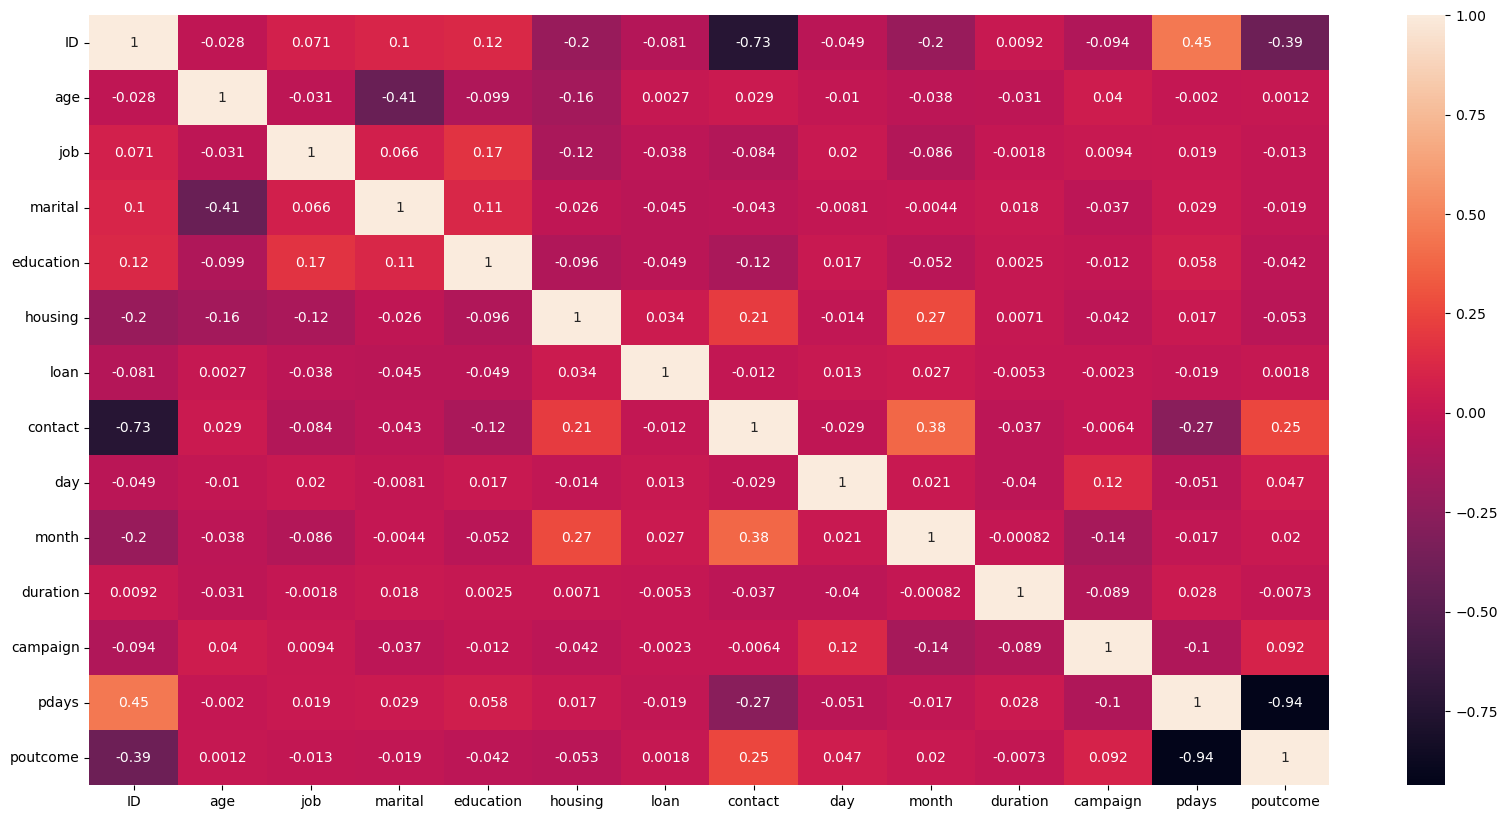

In [228]:
plt.figure(figsize = (20,10))
sns.heatmap(x.corr(),annot= True)

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)
vif_calc()

    VIF Factor   features
0     9.246835         ID
1    14.768551        age
2     2.848449        job
3     5.139288    marital
4     3.840600  education
5     2.412820    housing
6     1.209925       loan
7     3.788551    contact
8     4.515728        day
9     5.553239      month
10   14.027350   duration
11    2.335141   campaign
12   23.002854      pdays
13   68.293770   poutcome


In [230]:
# we have above 10 values in 'duration', 'age', 'pdays', 'poutcome' 
# removing 'duration' then checking VIF

In [232]:
x.drop(['duration'],axis=1,inplace=True)
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)
vif_calc()

KeyError: "['duration'] not found in axis"

In [233]:
# we still needs to drop pdays column to bring VIF below 10
x.drop(['pdays'],axis=1,inplace=True)
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)
vif_calc()

    VIF Factor   features
0     7.557419         ID
1    12.711103        age
2     2.834643        job
3     4.886369    marital
4     3.787630  education
5     2.358855    housing
6     1.206619       loan
7     3.641232    contact
8     4.478987        day
9     5.508737      month
10    2.330457   campaign
11    9.021768   poutcome


In [234]:
# Scaling input data with use of Standard scaler

In [235]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[ 0.32495394,  1.51046016, -1.32665665, ...,  1.16782819,
         0.21171628,  0.3926068 ],
       [ 1.4425111 , -0.9602675 ,  2.02559465, ..., -0.16743938,
         0.21171628,  0.3926068 ],
       [-0.50861731, -1.35558393,  0.80659418, ..., -0.16743938,
        -1.1200546 ,  0.3926068 ],
       ...,
       [ 1.41176399,  1.21397284, -0.10765618, ...,  0.16637751,
         0.21171628,  0.3926068 ],
       [-0.16947201, -0.8614384 , -0.10765618, ..., -1.50270694,
         0.79388413,  0.3926068 ],
       [ 1.28645791,  1.60928927,  1.41609441, ...,  0.83401129,
         1.67574208, -2.95529706]])

In [236]:
# Now we will check for data balance if it is not then we need to tackle it

In [237]:
y.value_counts()

0    25920
1     3002
Name: subscribed, dtype: int64

In [238]:
# so we can see that data is not balanced so we have to balanced it for data balanced we will use SMOTE method with over sampling

In [239]:
# since we observe that our targer variable is in binary type so we should use classifier model.

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score

In [241]:
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =i, test_size = 0.25, stratify=y)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At Random State :',i, 'model has perform very well')
        print('Random State = ',i)
        print("Training accuracy score is = ",accuracy_score(y_train,pred_train))
        print("Test accuracy score is = ",accuracy_score(y_test,pred_test),'\n')
        

At Random State : 0 model has perform very well
Random State =  0
Training accuracy score is =  0.8951177907888064
Test accuracy score is =  0.8946203844558153 

At Random State : 8 model has perform very well
Random State =  8
Training accuracy score is =  0.894656770088977
Test accuracy score is =  0.8950352648319735 

At Random State : 13 model has perform very well
Random State =  13
Training accuracy score is =  0.8953021990687382
Test accuracy score is =  0.8947586779145347 

At Random State : 14 model has perform very well
Random State =  14
Training accuracy score is =  0.8950716887188235
Test accuracy score is =  0.8954501452081317 

At Random State : 18 model has perform very well
Random State =  18
Training accuracy score is =  0.8947028721589599
Test accuracy score is =  0.8953118517494123 

At Random State : 24 model has perform very well
Random State =  24
Training accuracy score is =  0.8959015259785165
Test accuracy score is =  0.8964181994191674 

At Random State : 28 

In [242]:
# so we got higher accuracy for random state 50 

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5,test_size=0.25,stratify=y)
y_train.value_counts()

0    19440
1     2251
Name: subscribed, dtype: int64

In [244]:
y_test.value_counts()

0    6480
1     751
Name: subscribed, dtype: int64

In [245]:
# we will use Logistic Regression

In [246]:
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_lr)*100,'%',)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_lr))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_lr))

Accuracy of model = 89.54501452081317 %


Confusion matrix 
 [[6448   32]
 [ 724   27]]


Classification Report 
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      6480
           1       0.46      0.04      0.07       751

    accuracy                           0.90      7231
   macro avg       0.68      0.52      0.51      7231
weighted avg       0.85      0.90      0.85      7231



In [247]:
# we will now use Cross Validation

In [249]:
from sklearn.model_selection import cross_val_score
pred_lr_ac=accuracy_score(y_test,pred_lr)
for i in range(2,15):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_lr_ac*100, '\n')
   

At cv = 2
Cross validation score is = 89.53737639167416
Accuracy score is = 89.54501452081317 

At cv = 3
Cross validation score is = 89.54429653897176
Accuracy score is = 89.54501452081317 

At cv = 4
Cross validation score is = 89.51663710476619
Accuracy score is = 89.54501452081317 

At cv = 5
Cross validation score is = 89.51663636222357
Accuracy score is = 89.54501452081317 

At cv = 6
Cross validation score is = 89.50626624010964
Accuracy score is = 89.54501452081317 

At cv = 7
Cross validation score is = 89.53392777760537
Accuracy score is = 89.54501452081317 

At cv = 8
Cross validation score is = 89.50972376497876
Accuracy score is = 89.54501452081317 

At cv = 9
Cross validation score is = 89.48898741777934
Accuracy score is = 89.54501452081317 

At cv = 10
Cross validation score is = 89.53046629939487
Accuracy score is = 89.54501452081317 

At cv = 11
Cross validation score is = 89.52010315425395
Accuracy score is = 89.54501452081317 

At cv = 12
Cross validation score is =

In [250]:
# for cv =3 we have best match

In [252]:
lsscore_selected=cross_val_score(lr,x,y,cv=3)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','Accuracy score =',pred_lr_ac*100)

Cross validation score = 89.54429653897176 
 Accuracy score = 89.54501452081317


In [253]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [254]:
# we will use random state and apply accurate one. As well we will use Hyperparameter tuning

In [255]:
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
bg=BaggingClassifier()
rfc=RandomForestClassifier()
ext=ExtraTreesClassifier()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [256]:
#GradientBoostingClassifier
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_gb)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_gb))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_gb))

Accuracy of model = 90.84497303277554


Confusion matrix 
 [[6370  110]
 [ 552  199]]


Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      6480
           1       0.64      0.26      0.38       751

    accuracy                           0.91      7231
   macro avg       0.78      0.62      0.66      7231
weighted avg       0.89      0.91      0.89      7231



In [257]:
pred_gb_ac=accuracy_score(y_test,pred_gb)
for i in range(2,15):
    gsscore=cross_val_score(gb,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_gb_ac*100,'\n')
  

At cv = 2
Cross validation score is = 90.78210358896341
Accuracy score is = 90.84497303277554 

At cv = 3
Cross validation score is = 90.91348713417497
Accuracy score is = 90.84497303277554 

At cv = 4
Cross validation score is = 90.89273544270068
Accuracy score is = 90.84497303277554 

At cv = 5
Cross validation score is = 90.91694251480256
Accuracy score is = 90.84497303277554 

At cv = 6
Cross validation score is = 90.85470708917275
Accuracy score is = 90.84497303277554 

At cv = 7
Cross validation score is = 90.86853246670772
Accuracy score is = 90.84497303277554 

At cv = 8
Cross validation score is = 90.96881732028544
Accuracy score is = 90.84497303277554 

At cv = 9
Cross validation score is = 90.95842490122418
Accuracy score is = 90.84497303277554 

At cv = 10
Cross validation score is = 90.97573123277965
Accuracy score is = 90.84497303277554 

At cv = 11
Cross validation score is = 90.94460507695743
Accuracy score is = 90.84497303277554 

At cv = 12
Cross validation score is =

In [258]:
# @ cv= 6 we have best match

In [259]:
gsscore_selected=cross_val_score(gb,x,y,cv=6)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_gb_ac*100)

Cross validation score = 90.85470708917275 
 Accuracy score = 90.84497303277554


In [260]:
# AdaBoostClassifier
ada.fit(x_train,y_train)
pred_ada=ada.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_ada)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_ada))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_ada))

Accuracy of model = 90.3471165813857


Confusion matrix 
 [[6374  106]
 [ 592  159]]


Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      6480
           1       0.60      0.21      0.31       751

    accuracy                           0.90      7231
   macro avg       0.76      0.60      0.63      7231
weighted avg       0.88      0.90      0.88      7231



In [261]:
pred_ada_ac=accuracy_score(y_test,pred_ada)
for i in range(2,15):
    adasscore=cross_val_score(ada,x,y,cv=i)
    adasc=adasscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',adasc*100)
    print('Accuracy score is =',pred_ada_ac*100,'\n')
    

At cv = 2
Cross validation score is = 90.55044602724568
Accuracy score is = 90.3471165813857 

At cv = 3
Cross validation score is = 90.48474716743254
Accuracy score is = 90.3471165813857 

At cv = 4
Cross validation score is = 90.57810395651272
Accuracy score is = 90.3471165813857 

At cv = 5
Cross validation score is = 90.5400723959398
Accuracy score is = 90.3471165813857 

At cv = 6
Cross validation score is = 90.54006962393379
Accuracy score is = 90.3471165813857 

At cv = 7
Cross validation score is = 90.49167358552424
Accuracy score is = 90.3471165813857 

At cv = 8
Cross validation score is = 90.6299744335916
Accuracy score is = 90.3471165813857 

At cv = 9
Cross validation score is = 90.61268718385662
Accuracy score is = 90.3471165813857 

At cv = 10
Cross validation score is = 90.5781184037972
Accuracy score is = 90.3471165813857 

At cv = 11
Cross validation score is = 90.64035419764946
Accuracy score is = 90.3471165813857 

At cv = 12
Cross validation score is = 90.616165075

In [262]:
# @ cv=3 we ahve best match

In [263]:
lsscore_selected=cross_val_score(ada,x,y,cv=3)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','Accuracy score =',pred_ada_ac*100)

Cross validation score = 90.48474716743254 
 Accuracy score = 90.3471165813857


In [264]:
# BaggingClassifier()
bg.fit(x_train,y_train)
pred_bg=bg.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_bg)*100)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_bg))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_bg))

Accuracy of model = 90.01521228045914


Confusion matrix 
 [[6304  176]
 [ 546  205]]


Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      6480
           1       0.54      0.27      0.36       751

    accuracy                           0.90      7231
   macro avg       0.73      0.62      0.65      7231
weighted avg       0.88      0.90      0.89      7231



In [265]:
pred_bg_ac=accuracy_score(y_test,pred_bg)
for i in range(2,10):
    bgsscore=cross_val_score(bg,x,y,cv=i)
    bgsc=bgsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',bgsc*100)
    print('Accuracy score is =',pred_bg_ac*100,'\n')
 

At cv = 2
Cross validation score is = 90.01452181730171
Accuracy score is = 90.01521228045914 

At cv = 3
Cross validation score is = 89.94191581510674
Accuracy score is = 90.01521228045914 

At cv = 4
Cross validation score is = 90.19085931882725
Accuracy score is = 90.01521228045914 

At cv = 5
Cross validation score is = 90.11479765358735
Accuracy score is = 90.01521228045914 

At cv = 6
Cross validation score is = 90.15974372149508
Accuracy score is = 90.01521228045914 

At cv = 7
Cross validation score is = 90.23924450327021
Accuracy score is = 90.01521228045914 

At cv = 8
Cross validation score is = 90.16666169414557
Accuracy score is = 90.01521228045914 

At cv = 9
Cross validation score is = 90.18741147845435
Accuracy score is = 90.01521228045914 



In [266]:
 # @ cv=2 we have best match

In [269]:
lsscore_selected=cross_val_score(bg,x,y,cv=2)
print('Cross validation score =',lsscore_selected.mean()*100,'\n','Accuracy score =',pred_bg_ac*100)

Cross validation score = 89.8381854643524 
 Accuracy score = 90.01521228045914


In [270]:
# RandomForestClassifier
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_rfc)*100,'\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_rfc),'\n')
print('Classification Report','\n',classification_report(y_test,pred_rfc),'\n')

Accuracy of model = 90.66519153644033 

Confusion matrix 
 [[6329  151]
 [ 524  227]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      6480
           1       0.60      0.30      0.40       751

    accuracy                           0.91      7231
   macro avg       0.76      0.64      0.68      7231
weighted avg       0.89      0.91      0.89      7231
 



In [271]:
pred_rfc_ac=accuracy_score(y_test,pred_rfc)
for i in range(2,10):
    gsscore=cross_val_score(rfc,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_rfc_ac*100,'\n')

At cv = 2
Cross validation score is = 90.48820966738123
Accuracy score is = 90.66519153644033 

At cv = 3
Cross validation score is = 90.66800309535563
Accuracy score is = 90.66519153644033 

At cv = 4
Cross validation score is = 90.64379621856334
Accuracy score is = 90.66519153644033 

At cv = 5
Cross validation score is = 90.54006103924515
Accuracy score is = 90.66519153644033 

At cv = 6
Cross validation score is = 90.68528277765871
Accuracy score is = 90.66519153644033 

At cv = 7
Cross validation score is = 90.77173039330346
Accuracy score is = 90.66519153644033 

At cv = 8
Cross validation score is = 90.7025952352538
Accuracy score is = 90.66519153644033 

At cv = 9
Cross validation score is = 90.78899807635608
Accuracy score is = 90.66519153644033 



In [272]:
# @ cv = 3 we have best match 
gsscore_selected=cross_val_score(rfc,x,y,cv=3)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_rfc_ac*100)

Cross validation score = 90.61959655935784 
 Accuracy score = 90.66519153644033


In [273]:
# ExtraTreesClassifier
ext.fit(x_train,y_train)
pred_ext=ext.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_ext)*100,'\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_ext),'\n')
print('Classification Report','\n',classification_report(y_test,pred_ext),'\n')

Accuracy of model = 90.09818835569078 

Confusion matrix 
 [[6291  189]
 [ 527  224]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      6480
           1       0.54      0.30      0.38       751

    accuracy                           0.90      7231
   macro avg       0.73      0.63      0.67      7231
weighted avg       0.88      0.90      0.89      7231
 



In [274]:
pred_ext_ac=accuracy_score(y_test,pred_ext)
for i in range(2,10):
    gsscore=cross_val_score(ext,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_ext_ac*100,'\n')
    

At cv = 2
Cross validation score is = 89.93845515524515
Accuracy score is = 90.09818835569078 

At cv = 3
Cross validation score is = 89.95574814972306
Accuracy score is = 90.09818835569078 

At cv = 4
Cross validation score is = 90.0110677804359
Accuracy score is = 90.09818835569078 

At cv = 5
Cross validation score is = 90.02144681898983
Accuracy score is = 90.09818835569078 

At cv = 6
Cross validation score is = 90.07676119030877
Accuracy score is = 90.09818835569078 

At cv = 7
Cross validation score is = 90.12172937727671
Accuracy score is = 90.09818835569078 

At cv = 8
Cross validation score is = 90.0525738916633
Accuracy score is = 90.09818835569078 

At cv = 9
Cross validation score is = 90.01106938277243
Accuracy score is = 90.09818835569078 



In [275]:
# @ cv = 8
gsscore_selected=cross_val_score(ext,x,y,cv=8)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_ext_ac*100)

Cross validation score = 90.03181744115597 
 Accuracy score = 90.09818835569078


In [276]:
# GaussianNB
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_gnb)*100,'\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_gnb),'\n')
print('Classification Report','\n',classification_report(y_test,pred_gnb),'\n')

Accuracy of model = 85.23025860876781 

Confusion matrix 
 [[5789  691]
 [ 377  374]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      6480
           1       0.35      0.50      0.41       751

    accuracy                           0.85      7231
   macro avg       0.65      0.70      0.66      7231
weighted avg       0.88      0.85      0.86      7231
 



In [277]:
pred_gnb_ac=accuracy_score(y_test,pred_gnb)
for i in range(2,10):
    gsscore=cross_val_score(gnb,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_gnb_ac*100,'\n')

At cv = 2
Cross validation score is = 85.4436069428117
Accuracy score is = 85.23025860876781 

At cv = 3
Cross validation score is = 85.39521340322273
Accuracy score is = 85.23025860876781 

At cv = 4
Cross validation score is = 85.41943086216503
Accuracy score is = 85.23025860876781 

At cv = 5
Cross validation score is = 85.40213458041794
Accuracy score is = 85.23025860876781 

At cv = 6
Cross validation score is = 85.44706724814758
Accuracy score is = 85.23025860876781 

At cv = 7
Cross validation score is = 85.44014345427199
Accuracy score is = 85.23025860876781 

At cv = 8
Cross validation score is = 85.42285841166967
Accuracy score is = 85.23025860876781 

At cv = 9
Cross validation score is = 85.47128393714611
Accuracy score is = 85.23025860876781 



In [278]:
# @ cv = 3 we have best match
gsscore_selected=cross_val_score(gnb,x,y,cv=3)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_gnb_ac*100)

Cross validation score = 85.39521340322273 
 Accuracy score = 85.23025860876781


In [279]:
# SVC
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_svc)*100,'\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_svc),'\n')
print('Classification Report','\n',classification_report(y_test,pred_svc),'\n')

Accuracy of model = 90.5545567694648 

Confusion matrix 
 [[6420   60]
 [ 623  128]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      6480
           1       0.68      0.17      0.27       751

    accuracy                           0.91      7231
   macro avg       0.80      0.58      0.61      7231
weighted avg       0.89      0.91      0.88      7231
 



In [280]:
pred_svc_ac=accuracy_score(y_test,pred_svc)
for i in range(2,5):
    gsscore=cross_val_score(svc,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_svc_ac*100,'\n')
    

At cv = 2
Cross validation score is = 90.47783694073715
Accuracy score is = 90.5545567694648 

At cv = 3
Cross validation score is = 90.47783906991278
Accuracy score is = 90.5545567694648 

At cv = 4
Cross validation score is = 90.49513314140573
Accuracy score is = 90.5545567694648 



In [281]:
gsscore_selected=cross_val_score(svc,x,y,cv=4)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_svc_ac*100)

Cross validation score = 90.49513314140573 
 Accuracy score = 90.5545567694648


In [282]:
# KNeighborsClassifier
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_knn)*100, '\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_knn),'\n')
print('Classification Report','\n',classification_report(y_test,pred_knn))

Accuracy of model = 89.68330797953257 

Confusion matrix 
 [[6317  163]
 [ 583  168]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6480
           1       0.51      0.22      0.31       751

    accuracy                           0.90      7231
   macro avg       0.71      0.60      0.63      7231
weighted avg       0.87      0.90      0.88      7231



In [283]:
pred_knn_ac=accuracy_score(y_test,pred_knn)
for i in range(2,10):
    gsscore=cross_val_score(knn,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_knn_ac*100,'\n')

At cv = 2
Cross validation score is = 89.56849457160638
Accuracy score is = 89.68330797953257 

At cv = 3
Cross validation score is = 89.56849693771257
Accuracy score is = 89.68330797953257 

At cv = 4
Cross validation score is = 89.66876469128903
Accuracy score is = 89.68330797953257 

At cv = 5
Cross validation score is = 89.6687670574565
Accuracy score is = 89.68330797953257 

At cv = 6
Cross validation score is = 89.72753912329732
Accuracy score is = 89.68330797953257 

At cv = 7
Cross validation score is = 89.76211533219171
Accuracy score is = 89.68330797953257 

At cv = 8
Cross validation score is = 89.77248612284117
Accuracy score is = 89.68330797953257 

At cv = 9
Cross validation score is = 89.7621174815313
Accuracy score is = 89.68330797953257 



In [284]:
gsscore_selected=cross_val_score(knn,x,y,cv=4)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_knn_ac*100)

Cross validation score = 89.66876469128903 
 Accuracy score = 89.68330797953257


In [285]:
# So from all above model Random Forest and Extra Trees are best match so we will apply hyperparameter on this two

In [286]:
# Random Forest

In [287]:
rfch=RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None,min_samples_split=3,max_features='log2')
# RandomForestClassifier
rfch.fit(x_train,y_train)
pred_rfch=rfch.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_rfch)*100,'\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_rfch),'\n')
print('Classification Report','\n',classification_report(y_test,pred_rfch))

Accuracy of model = 90.59604480708062 

Confusion matrix 
 [[6327  153]
 [ 527  224]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      6480
           1       0.59      0.30      0.40       751

    accuracy                           0.91      7231
   macro avg       0.76      0.64      0.67      7231
weighted avg       0.89      0.91      0.89      7231



In [288]:
pred_rfch_ac=accuracy_score(y_test,pred_rfch)
for i in range(2,10):
    gsscore=cross_val_score(rfch,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_rfch_ac*100,'\n')

At cv = 2
Cross validation score is = 90.67837632252265
Accuracy score is = 90.59604480708062 

At cv = 3
Cross validation score is = 90.68529181000403
Accuracy score is = 90.59604480708062 

At cv = 4
Cross validation score is = 90.69565770016256
Accuracy score is = 90.59604480708062 

At cv = 5
Cross validation score is = 90.68527969148045
Accuracy score is = 90.59604480708062 

At cv = 6
Cross validation score is = 90.7233237596121
Accuracy score is = 90.59604480708062 

At cv = 7
Cross validation score is = 90.8443336222063
Accuracy score is = 90.59604480708062 

At cv = 8
Cross validation score is = 90.84780815095657
Accuracy score is = 90.59604480708062 

At cv = 9
Cross validation score is = 90.78900991204597
Accuracy score is = 90.59604480708062 



In [292]:
# @ cv = 4 we have best match
gsscore_selected=cross_val_score(rfch,x,y,cv=4)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_rfch_ac*100)

Cross validation score = 90.80630585654626 
 Accuracy score = 90.59604480708062


In [290]:
# ExtraTreesClassifier

In [293]:
exth=ExtraTreesClassifier(n_estimators=200,criterion='entropy',max_depth=None,min_samples_split=3,max_features='sqrt')
exth.fit(x_train,y_train)
pred_exth=ext.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_exth)*100,'\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_exth),'\n')
print('Classification Report','\n',classification_report(y_test,pred_exth))

Accuracy of model = 90.09818835569078 

Confusion matrix 
 [[6291  189]
 [ 527  224]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      6480
           1       0.54      0.30      0.38       751

    accuracy                           0.90      7231
   macro avg       0.73      0.63      0.67      7231
weighted avg       0.88      0.90      0.89      7231



In [294]:
pred_exth_ac=accuracy_score(y_test,pred_exth)
for i in range(2,5):
    gsscore=cross_val_score(exth,x,y,cv=i)
    gsc=gsscore.mean()
    print('At cv =',i)
    print('Cross validation score is =',gsc*100)
    print('Accuracy score is =',pred_exth_ac*100,'\n')

At cv = 2
Cross validation score is = 90.38102482539243
Accuracy score is = 90.09818835569078 

At cv = 3
Cross validation score is = 90.26692994978941
Accuracy score is = 90.09818835569078 

At cv = 4
Cross validation score is = 90.45363362715433
Accuracy score is = 90.09818835569078 



In [295]:
# @cv = 3 we have best match

gsscore_selected=cross_val_score(exth,x,y,cv=3)
print('Cross validation score =',gsscore_selected.mean()*100,'\n','Accuracy score =',pred_exth_ac*100)

Cross validation score = 90.34990458999522 
 Accuracy score = 90.09818835569078


In [ ]:
#  from above both method RandomForest has best match

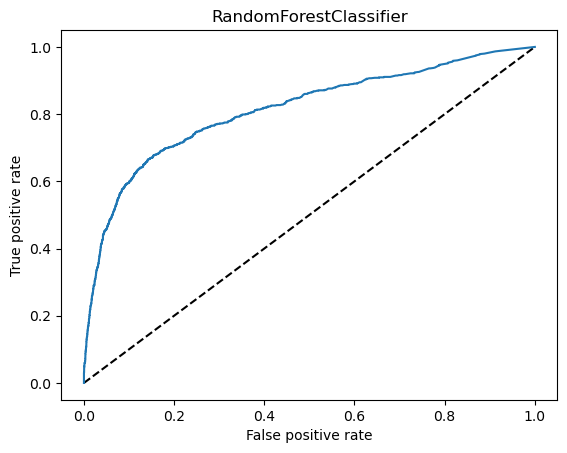

0.6373289317946442

In [296]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob=rfch.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rfch.predict(x_test))
auc_score

In [298]:
# now we will save our model
import joblib
joblib.dump(rfch,'RFC_Bank_Marketing.obj')


['RFC_Bank_Marketing.obj']

In [301]:
#now we will call test dataset
bm_test = pd.read_csv('termdeposit_test.csv')

In [303]:
bm_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [304]:
le=LabelEncoder()
bm_test['job']=le.fit_transform(bm_test['job'])
bm_test['marital']=le.fit_transform(bm_test['marital'])
bm_test['education']=le.fit_transform(bm_test['education'])
bm_test['default']=le.fit_transform(bm_test['default'])
bm_test['housing']=le.fit_transform(bm_test['housing'])
bm_test['loan']=le.fit_transform(bm_test['loan'])
bm_test['contact']=le.fit_transform(bm_test['contact'])
bm_test['month']=le.fit_transform(bm_test['month'])
bm_test['poutcome']=le.fit_transform(bm_test['poutcome'])
bm_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


In [306]:
# we will remove outliers from test data
from scipy.stats import zscore
z=np.abs(zscore(bm_test))
threshold=3

Xte=bm_test[(z<3).all(axis=1)]
print(Xte.shape)

(11821, 17)


In [307]:
Xte['campaign']=boxcox(Xte['campaign'])[0]

In [308]:
#for scaling we use standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtes=sc.fit_transform(Xte)
Xtes

array([[ 1.29104628, -0.85919547,  0.80034777, ..., -0.37447862,
        -0.34849798,  0.39301405],
       [-1.41270642, -0.9579552 ,  0.49617753, ..., -0.37447862,
        -0.34849798,  0.39301405],
       [ 1.21172104,  1.60979784,  0.80034777, ..., -0.37447862,
        -0.34849798,  0.39301405],
       ...,
       [-0.7872904 ,  1.31351864, -1.02467364, ..., -0.37447862,
        -0.34849798,  0.39301405],
       [ 0.50098564, -0.56291627,  0.1920073 , ..., -0.37447862,
        -0.34849798,  0.39301405],
       [ 1.81432814, -1.15547466, -1.32884387, ...,  0.82016116,
         2.61950964, -0.70476928]])

In [309]:
import joblib
load_bank = joblib.load('RFC_Bank_Marketing.obj')
load_bank

RandomForestClassifier(max_features='log2', min_samples_split=3,
                       n_estimators=200)

In [ ]:
pre_test=load_bank.predict(Xtes)
dff=pd.DataFrame({'ans':pre_test})
dff